### Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modelmetrics = pd.read_csv('../datasets/Metrics_for_Models.csv')
basepred = pd.read_csv('../datasets/baseline.csv')
ridgepred = pd.read_csv('../datasets/Ridge_Model_submission.csv')

In [5]:
modelmetrics

,Model,R2 Score(train),R2 Score(Val),MAE,RMSE,Description
0,Mode 1,0.771023,0.835513,23307.513959,31779.748064,Baseline
1,Model 2,0.886713,0.852980,21157.810887,31094.158241,Poly
2,Model 3,0.777809,0.807667,25021.056681,35564.524098,Dropped Full Bath and Half Bath
3,Model 4,0.780299,0.811278,24684.392809,35229.123817,StandardScaled
4,Model 5,0.885289,0.871826,19836.248501,28053.375859,Poly and SC
5,Model 6,0.880983,0.877115,19523.526618,27468.513989,RidgeCv


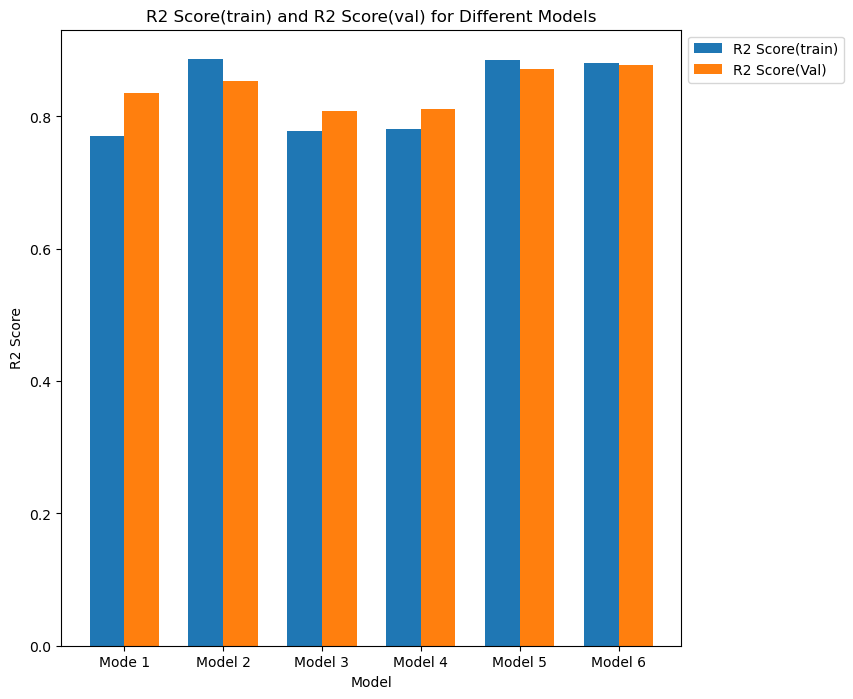

In [56]:
plt.figure(figsize=(8,8))
models = modelmetrics['Model']
r2_train = modelmetrics['R2 Score(train)']
r2_val = modelmetrics['R2 Score(Val)']

bar_width = 0.35
x_indices = np.arange(len(models))
plt.bar(x_indices - bar_width/2, r2_train, width=bar_width, label='R2 Score(train)')
plt.bar(x_indices + bar_width/2, r2_val, width=bar_width, label='R2 Score(Val)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score(train) and R2 Score(val) for Different Models')
plt.xticks(x_indices, models)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('../Graphs/R2 score bar graph', dpi=1200)

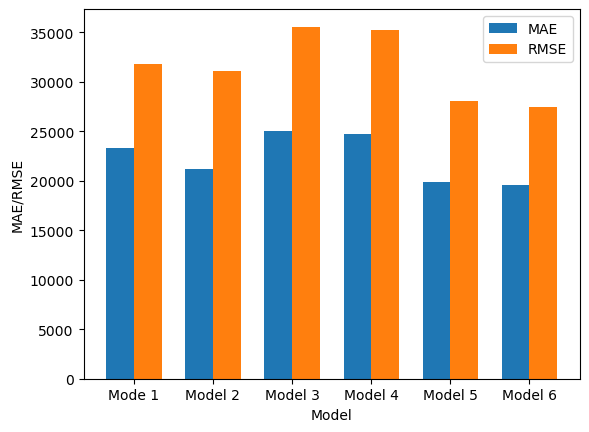

In [58]:
models = modelmetrics['Model']
mae = modelmetrics['MAE']
rmse = modelmetrics['RMSE']

bar_width = 0.35
x_indices = np.arange(len(models))
plt.bar(x_indices - bar_width/2, mae, width=bar_width, label='MAE')
plt.bar(x_indices + bar_width/2, rmse, width=bar_width, label='RMSE')
plt.xlabel('Model')
plt.ylabel('MAE/RMSE')

plt.xticks(x_indices, models)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('../Graphs/MAE and RMSE graph', dpi=900)

From initial looks at the R2 graph, we would assume that model 2, 5 and 6 have very little difference between the them. However when looking at the Mean Absolute Error (MAE) and the Root Mean Square Error(RMSE), the difference becomes a little more obvious. With these values showing the variation between the evaluation prices and the testing prediction, we want to ensure that we select model with the smallest difference to ensure that we can fairly compensate the home owners which is why we have decided to select model 6 as our final model.

This also helps understand how the preprocessing and feature engineering helped improve the performance of our model. As we can see that introducing Polynominal features on its own only made a small difference to both the MAE and RMSE, but utilising the Standard Scalar to help scale the variables to unit variables, especially in the case of mixing categorical and numerical data around 4000 reduction to both the scores from model 1 to model 5.

When we compare model 5 and model 6, where both these models were trained with the same data, with model 5 using a Linear Regression model and model 6 using a Ridge CV Regression model. I believe model 6 performed better, one due to the added regularization that the Ridge model, helping control the polynomial features and standard scaling that was implements on the data and handling multicollinearity with the data points that highly correlated with the sale price, as we saw within the heatmap during our EDA. The Ridge model also helps prevent overfitting, especially in the case of utilisinng small datasets, ensuring that the model doesn't only work with the training data but also works with any new data that is introduced to the model.

In [32]:
basepred

,Id,SalePrice
0,2658,168896.466169
1,2718,207595.415056
2,2414,196377.360339
3,1989,111529.201270
4,625,183677.354017
...,...,...
873,1662,196179.037421
874,1234,199060.240590
875,1373,135338.843026
876,1672,100911.901569


In [33]:
ridgepred

,Id,SalePrice
0,2658,169655.378726
1,2718,166193.746712
2,2414,168218.334443
3,1989,114667.830382
4,625,181170.998816
...,...,...
873,1662,203009.587039
874,1234,206785.628568
875,1373,139227.921053
876,1672,113383.753439


In [60]:
ridgepred['SalePrice'].sum().round(2)

157135272.02

In [61]:
19523.526618 * 878

17141656.370604

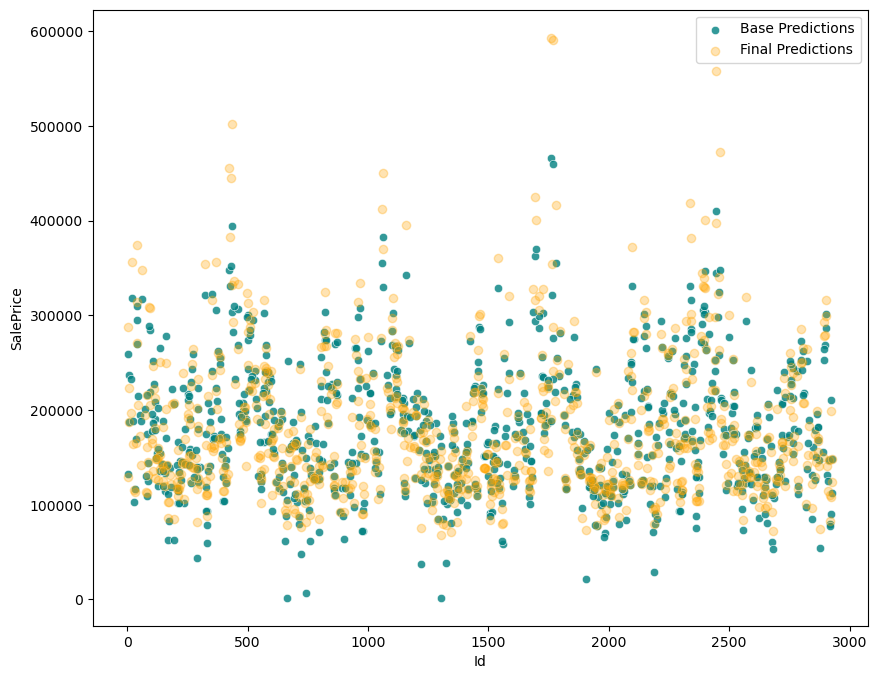

In [66]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=basepred, x='Id', y='SalePrice', color ='teal', alpha=0.8,
                label='Base Predictions')
plt.scatter(data=ridgepred, x='Id', y='SalePrice', color ='orange', alpha=0.3,
           label = 'Final Predictions')
plt.legend()
plt.savefig('../Graphs/Base vs final predictions', dpi=900)

When we compare the base predicted values with the production model predicted Sales price, which can slight differences between the values and how the models performance has changed and interperated the same data to improve its performance.